<a href="https://colab.research.google.com/github/b-fatma/S2I-DM/blob/master/src/5_supervised/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the data

In [ ]:
y_train = pd.read_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/y_test.csv')

X_test = pd.read_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/X_test.csv')
X_train = pd.read_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/X_train.csv')

X_test_scaled = pd.read_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/X_test_scaled.csv')
X_train_scaled = pd.read_csv('/content/drive/MyDrive/dm_fire_prediction/feature_engineering/v1/X_train_scaled.csv')

In [ ]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

## K-NN test

### Original

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

# knn = KNeighborsClassifier()

# param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11],
# }

# grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
# grid_search.fit(X_res_o, y_res_o)

# best_knn = grid_search.best_estimator_
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(classification_report(y_train, best_knn.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     38228
           1       0.93      0.94      0.93     11469

    accuracy                           0.97     49697
   macro avg       0.95      0.96      0.95     49697
weighted avg       0.97      0.97      0.97     49697



### Random Over Sampler

((76456, 28), (76456,), np.int64(38228))

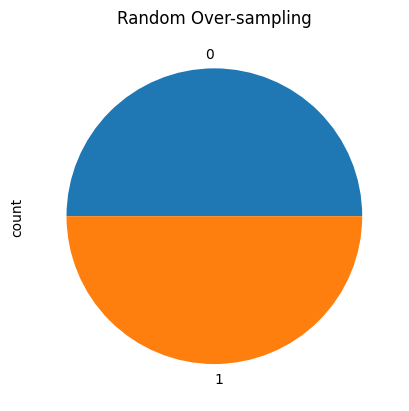

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_res_ros, y_res_ros = ros.fit_resample(X_train_scaled, y_train)
ax=y_res_ros.value_counts().plot.pie()
_ = ax.set_title("Random Over-sampling")
X_res_ros.shape, y_res_ros.shape, y_res_ros.sum()

In [ ]:
# knn = KNeighborsClassifier()

# param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11],
# }

# grid_search_ros = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
# grid_search_ros.fit(X_res_ros, y_res_ros)
# best_knn_ros = grid_search_ros.best_estimator_
# best_params_ros = grid_search_ros.best_params_
# best_score_ros = grid_search_ros.best_score_

# print("Best Parameters:", best_params_ros)
# print("Best Score:", best_score_ros)
best_knn_ros = KNeighborsClassifier(n_neighbors=3)
best_knn_ros.fit(X_res_ros, y_res_ros)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(classification_report(y_train, best_knn_ros.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     38228
           1       0.88      0.99      0.93     11469

    accuracy                           0.97     49697
   macro avg       0.94      0.98      0.96     49697
weighted avg       0.97      0.97      0.97     49697



### TOMEK

((49060, 28), (49060,), np.int64(11469))

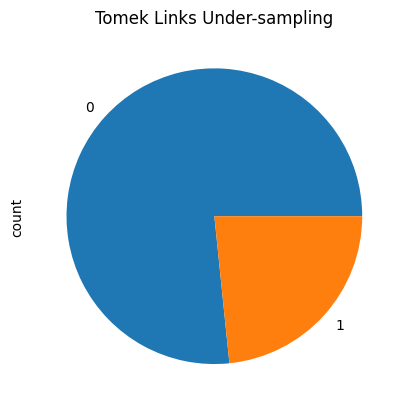

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_res_tl, y_res_tl = tl.fit_resample(X_train_scaled, y_train)

ax = y_res_tl.value_counts().plot.pie()
_ = ax.set_title("Tomek Links Under-sampling")

X_res_tl.shape, y_res_tl.shape, y_res_tl.sum()

In [ ]:
# knn = KNeighborsClassifier()

# param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11],
# }

# grid_search_tl = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
# grid_search_tl.fit(X_res_tl, y_res_tl)

# best_knn_tl = grid_search_tl.best_estimator_
# best_params_tl = grid_search_tl.best_params_
# best_score_tl = grid_search_tl.best_score_

# print("Best Parameters:", best_params_tl)
# print("Best Score:", best_score_tl)

best_knn_tl = KNeighborsClassifier(n_neighbors=3)
best_knn_tl.fit(X_res_tl, y_res_tl)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(classification_report(y_train, best_knn_tl.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     38228
           1       0.91      0.95      0.93     11469

    accuracy                           0.97     49697
   macro avg       0.95      0.96      0.95     49697
weighted avg       0.97      0.97      0.97     49697



### SMOTE Oversampling

((76456, 28), (76456,), np.int64(38228))

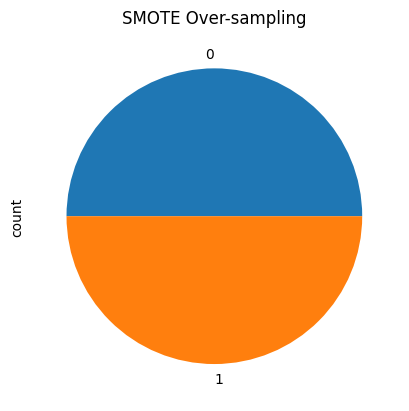

In [ ]:
from imblearn.over_sampling import SMOTE

smot = SMOTE(random_state=42)
X_smot_o, y_smot_o = smot.fit_resample(X_train_scaled, y_train)
ax=y_smot_o.value_counts().plot.pie()
_ = ax.set_title("SMOTE Over-sampling")
X_smot_o.shape, y_smot_o.shape, y_smot_o.sum()

In [ ]:
# knn = KNeighborsClassifier()

# param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11],
# }

# grid_search_smot = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
# grid_search_smot.fit(X_smot_o, y_smot_o)

# best_knn_smot = grid_search_smot.best_estimator_
# best_params_smot = grid_search_smot.best_params_
# best_score_smot = grid_search_smot.best_score_

# print("Best Parameters:", best_params_smot)
# print("Best Score:", best_score_smot)

best_knn_smot = KNeighborsClassifier(n_neighbors=3)
best_knn_smot.fit(X_smot_o, y_smot_o)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(classification_report(y_train, best_knn_smot.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     38228
           1       0.89      0.98      0.93     11469

    accuracy                           0.97     49697
   macro avg       0.94      0.97      0.95     49697
weighted avg       0.97      0.97      0.97     49697



# Evaluation on the test set

In [ ]:
print(classification_report(y_test, best_knn_smot.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      4248
           1       0.80      0.92      0.86      1274

    accuracy                           0.93      5522
   macro avg       0.89      0.93      0.91      5522
weighted avg       0.94      0.93      0.93      5522



In [ ]:
print(classification_report(y_test, best_knn_ros.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      4248
           1       0.79      0.93      0.85      1274

    accuracy                           0.93      5522
   macro avg       0.88      0.93      0.90      5522
weighted avg       0.93      0.93      0.93      5522



In [ ]:
print(classification_report(y_test, best_knn_tl.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4248
           1       0.84      0.89      0.87      1274

    accuracy                           0.94      5522
   macro avg       0.91      0.92      0.91      5522
weighted avg       0.94      0.94      0.94      5522



In [ ]:
print(classification_report(y_test, best_knn.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4248
           1       0.86      0.88      0.87      1274

    accuracy                           0.94      5522
   macro avg       0.91      0.92      0.91      5522
weighted avg       0.94      0.94      0.94      5522



In [ ]:
from collections import Counter
from tqdm import tqdm
from sklearn.neighbors import BallTree
import numpy as np

class KNN:
    def __init__(self, k=3, use_tqdm=False, use_balltree=True):
        self.k = k
        self.use_tqdm = use_tqdm
        self.use_balltree = use_balltree
        self.tree = None
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.array(X, dtype=float)
        self.y_train = np.array(y)

        if self.use_balltree:
            self.tree = BallTree(self.X_train, leaf_size=40, metric='euclidean')

        return self

    def predict(self, X):
        X = np.array(X, dtype=float)

        if self.use_balltree:
            # BallTree does batch querying efficiently
            dists, idxs = self.tree.query(X, k=self.k)
            return np.array([self._vote(self.y_train[i]) for i in idxs])

        # --- FALLBACK to brute force ---
        iterator = tqdm(X, desc="Predicting") if self.use_tqdm else X
        return np.array([self._predict_single(x) for x in iterator])

    def _predict_single(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        return self._vote(self.y_train[k_indices])

    def _vote(self, labels):
        most_common = Counter(labels).most_common(1)
        return most_common[0][0]

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

knn = KNN(k=5, use_tqdm=True, use_balltree=False)
knn.fit(X_res_tl, y_res_tl)

In [ ]:
y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Predicting: 100%|██████████| 5522/5522 [00:49<00:00, 111.92it/s]

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4248
           1       0.84      0.89      0.86      1274

    accuracy                           0.94      5522
   macro avg       0.90      0.92      0.91      5522
weighted avg       0.94      0.94      0.94      5522

Accuracy: 0.9357116986599058
